In [5]:
#K-Means Clustering
#K Means Clustering is a clustering method that sudivides a single cluster or a collection of data pts into k 
#different clusters or grps
#It is an unsupervized learning algorithm which grps it in unlevel dataset into different cluster.
#Here k diefinrs the no of predefined clusters that needs to be created in the process, for ex- if k = 2 
#there will be two clusters , if k=3 there will be 3 clusters and so on
#It is an iteretive algorithm that divides the unlevel into k diff clusters in such away that each dataset belongs 
#to only one grp that has similar properties

In [1]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [7]:
Data ={'x':[185,170,168,179,182,188,180,180,183,180,180,177],
      'y':[72,56,60,68,72,77,71,70,84,88,67,76]}
Data

{'x': [185, 170, 168, 179, 182, 188, 180, 180, 183, 180, 180, 177],
 'y': [72, 56, 60, 68, 72, 77, 71, 70, 84, 88, 67, 76]}

In [8]:
df=DataFrame(Data,columns=['x','y'])

In [9]:
df

,x,y
0,185,72
1,170,56
2,168,60
3,179,68
4,182,72
5,188,77
6,180,71
7,180,70
8,183,84
9,180,88


In [10]:
print("The shape of data",df.shape)

The shape of data (12, 2)


In [11]:
#Elbow method
#Choosing the right no of clusters is a important part of this algorithm.
#An ideal way to figure out the right nof cluster isto calculate the Within Cluster sum of squares(WCSS)
#A commonly used method for finding the optimal value of k is elbow Method 
#We are actually varying the no of clusters (k) generally from 1 to 10.For each value of k we are calculating wcss
#WCSS is the sum of squared distance between each point and the centroid in a cluster
#When we plot the WCSSS value with kValue the plot looks like an elbow
#As the no of clusters increases the wcss value will start to increase

In [12]:
wcss=[]
for i in range (1,13):
    km=KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

In [13]:
wcss

[1236.9166666666667,
 526.9000000000001,
 195.23809523809527,
 104.16666666666667,
 61.5,
 37.75,
 25.25,
 15.25,
 5.666666666666666,
 1.5,
 0.5,
 0.0]

<function matplotlib.pyplot.show(close=None, block=None)>

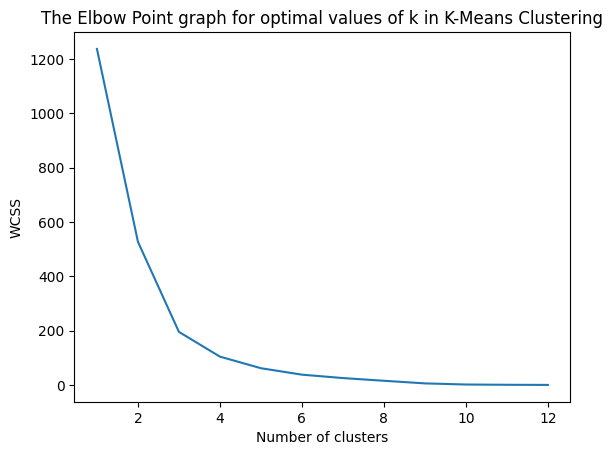

In [14]:
plt.plot(range(1,13),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("The Elbow Point graph for optimal values of k in K-Means Clustering")
plt.show

In [15]:
my_centroids=np.array([[185,72],[170,56],[168,60]])
kmeans=KMeans(n_clusters=3,init=my_centroids).fit(df)

/usr/local/lib64/python3.10/site-packages/sklearn/cluster/_kmeans.py:1307: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)


In [16]:
centroids=kmeans.cluster_centers_
print(centroids)

[[181.4  74.5]
 [170.   56. ]
 [168.   60. ]]


In [20]:
X=df.iloc[:,:].values
y_kmeans=kmeans.fit_predict(X)
y_kmeans

/usr/local/lib64/python3.10/site-packages/sklearn/cluster/_kmeans.py:1307: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)


array([0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

<function matplotlib.pyplot.show(close=None, block=None)>

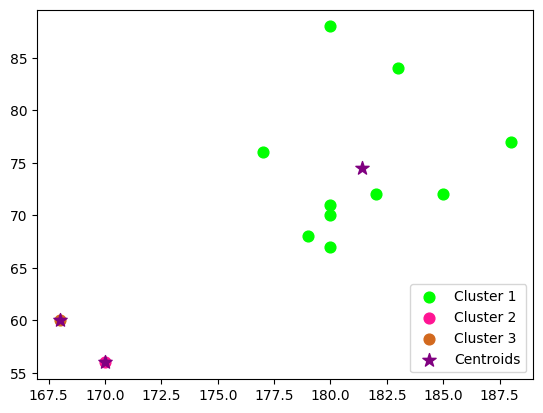

In [22]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=60,c='lime',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=60,c='deeppink',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=60,c='chocolate',label='Cluster 3')
plt.scatter(centroids[:,0], centroids[:,1],c='purple',s=100,marker='*',label='Centroids')
plt.legend(loc='lower right')
plt.show